In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
! pip install pandas-ta
import pandas_ta as ta
plt.style.use('fivethirtyeight')
data = yf.download(tickers = 'AAPL', start = '2015-01-01',end = '2024-04-01')
data.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,28.992500,29.125000,28.530001,26.058447,29.614380,30.494932,31.123954,31.080817,-2.498281,0,26.146719
1,28.645000,29.062500,28.625000,26.146719,30.973280,30.341128,31.079519,31.051667,-2.035154,0,27.097345
2,29.132500,29.997499,29.132500,27.097345,43.548797,30.301973,31.056757,31.036810,-3.765244,0,25.687256
3,29.452499,29.545000,28.332500,25.687256,33.770768,30.118214,31.003603,31.001521,-2.049154,0,26.083345
4,28.132500,28.855000,27.407499,26.083345,37.962943,29.993622,30.960165,30.972495,-2.947025,0,26.062975
5,29.010000,29.100000,28.635000,26.062975,37.830999,29.878753,30.917142,30.943554,-2.333691,0,26.246309
6,28.580000,29.077499,28.502501,26.246309,39.847073,29.794110,30.878981,30.917679,-2.492083,0,26.517918
7,29.010000,29.412500,28.875000,26.517918,42.791853,29.746100,30.847516,30.896121,-2.738968,0,26.368532
8,29.107500,29.360001,29.002501,26.368532,41.591988,29.686947,30.813407,30.872662,-2.993708,0,26.031292
9,29.025000,29.129999,28.670000,26.031292,38.950282,29.597952,30.772597,30.844580,-3.022877,0,25.497124


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.03699009 0.03512967 0.03528839 ... 0.38189148 0.         0.03035011]
 [0.03501026 0.03477597 0.03583239 ... 0.40834942 0.         0.0357183 ]
 [0.03778771 0.04006735 0.03873849 ... 0.30951131 0.         0.02775553]
 ...
 [0.84360759 0.84335257 0.84224012 ... 0.50804857 0.         0.84105112]
 [0.84036005 0.84040974 0.84298456 ... 0.69028906 1.         0.86138024]
 [0.84269599 0.85274691 0.8460195  ... 0.50919052 0.         0.85104623]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
#print(y)
print(y.shape)

2175
(2145, 30, 8)
(2145, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1716
(1716, 30, 8)
(429, 30, 8)
(1716, 1)
(429, 1)
[[0.02995391]
 [0.02764046]
 [0.02881634]
 ...
 [0.69826039]
 [0.69619171]
 [0.71285395]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
103/103 [==============================] - 11s 75ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 2/30
103/103 [==============================] - 6s 57ms/step - loss: 1.9672e-04 - val_loss: 0.0011
Epoch 3/30
103/103 [==============================] - 7s 65ms/step - loss: 2.2254e-04 - val_loss: 0.0015
Epoch 4/30
103/103 [==============================] - 7s 65ms/step - loss: 1.7550e-04 - val_loss: 0.0012
Epoch 5/30
103/103 [==============================] - 4s 42ms/step - loss: 1.6832e-04 - val_loss: 0.0011
Epoch 6/30
103/103 [==============================] - 3s 29ms/step - loss: 1.8923e-04 - val_loss: 9.7828e-04
Epoch 7/30
103/103 [==============================] - 3s 25ms/step - loss: 1.9605e-04 - val_loss: 9.1734e-04
Epoch 8/30
103/103 [==============================] - 3s 26ms/step - loss: 1.6395e-04 - val_loss: 0.0011
Epoch 9/30
103/103 [==============================] - 3s 25ms/step - loss: 2.2424e-04 - val_loss: 0.0012
Epoch 10/30
103/103 [=============================

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

14/14 [==============================] - 1s 22ms/step
[0.6917963] [0.72235938]
[0.7005572] [0.70502626]
[0.7120369] [0.72700021]
[0.7051063] [0.73840665]
[0.71494126] [0.75132271]
[0.7256613] [0.74427759]
[0.7368106] [0.73790326]
[0.73748744] [0.7303551]
[0.7339324] [0.75937435]
[0.7272894] [0.76250572]


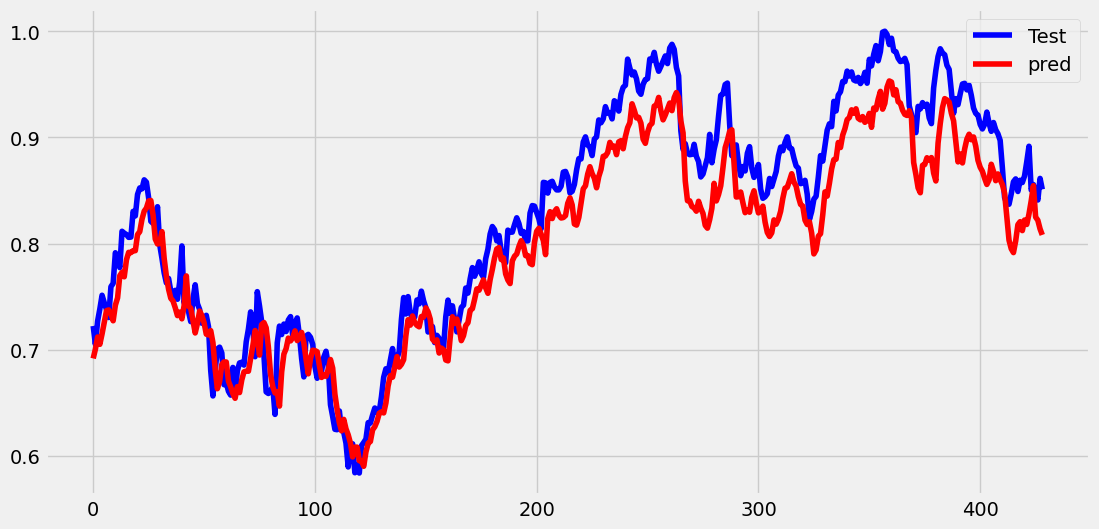

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'red', label = 'pred')
plt.legend()
plt.show()